In [115]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

dataset

In [116]:
# data = pd.read_csv('./test.csv', encoding='utf-16', sep='\t')
data = pd.read_csv('./data/full_data.csv', encoding='utf-16', sep='\t')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()
num = int(len(data) * 0.5)
data = data.iloc[:num,:]
num, data.head()

(20739,
     时间  1区冷凝水温度（℃）d  1区蒸汽压力（bar）d  1区筒壁温度（℃）d  2区冷凝水温度（℃）d  2区蒸汽压力（bar）d  \
 0  0.0     123.6816      1.273871    124.0506     123.7884      1.282008   
 1  1.0     123.6804      1.274053    124.0531     123.8447      1.273981   
 2  2.0     123.6840      1.274180    124.0549     123.6706      1.259945   
 3  3.0     123.6870      1.274352    124.0573     123.5482      1.263398   
 4  4.0     123.6857      1.274520    124.0596     123.6439      1.272326   
 
    2区筒壁温度（℃）d  2号切丝机运行  KLD1区蒸汽薄膜阀开度（%）d  KLD1区蒸汽薄膜阀开度反馈值TIC1-Y1（%）D  ...  \
 0    124.1638      0.0          7.130246                         7.4  ...   
 1    124.0521      0.0          7.114031                         7.4  ...   
 2    123.8562      0.0          7.094557                         7.4  ...   
 3    123.9045      0.0          7.075699                         7.4  ...   
 4    124.0291      0.0          7.056201                         7.4  ...   
 
    热风电机电流d  筒体电机电流d  膨胀轮电机电流d  锅炉分汽缸压力-薄板D  除尘房排潮风机频率(Hz)

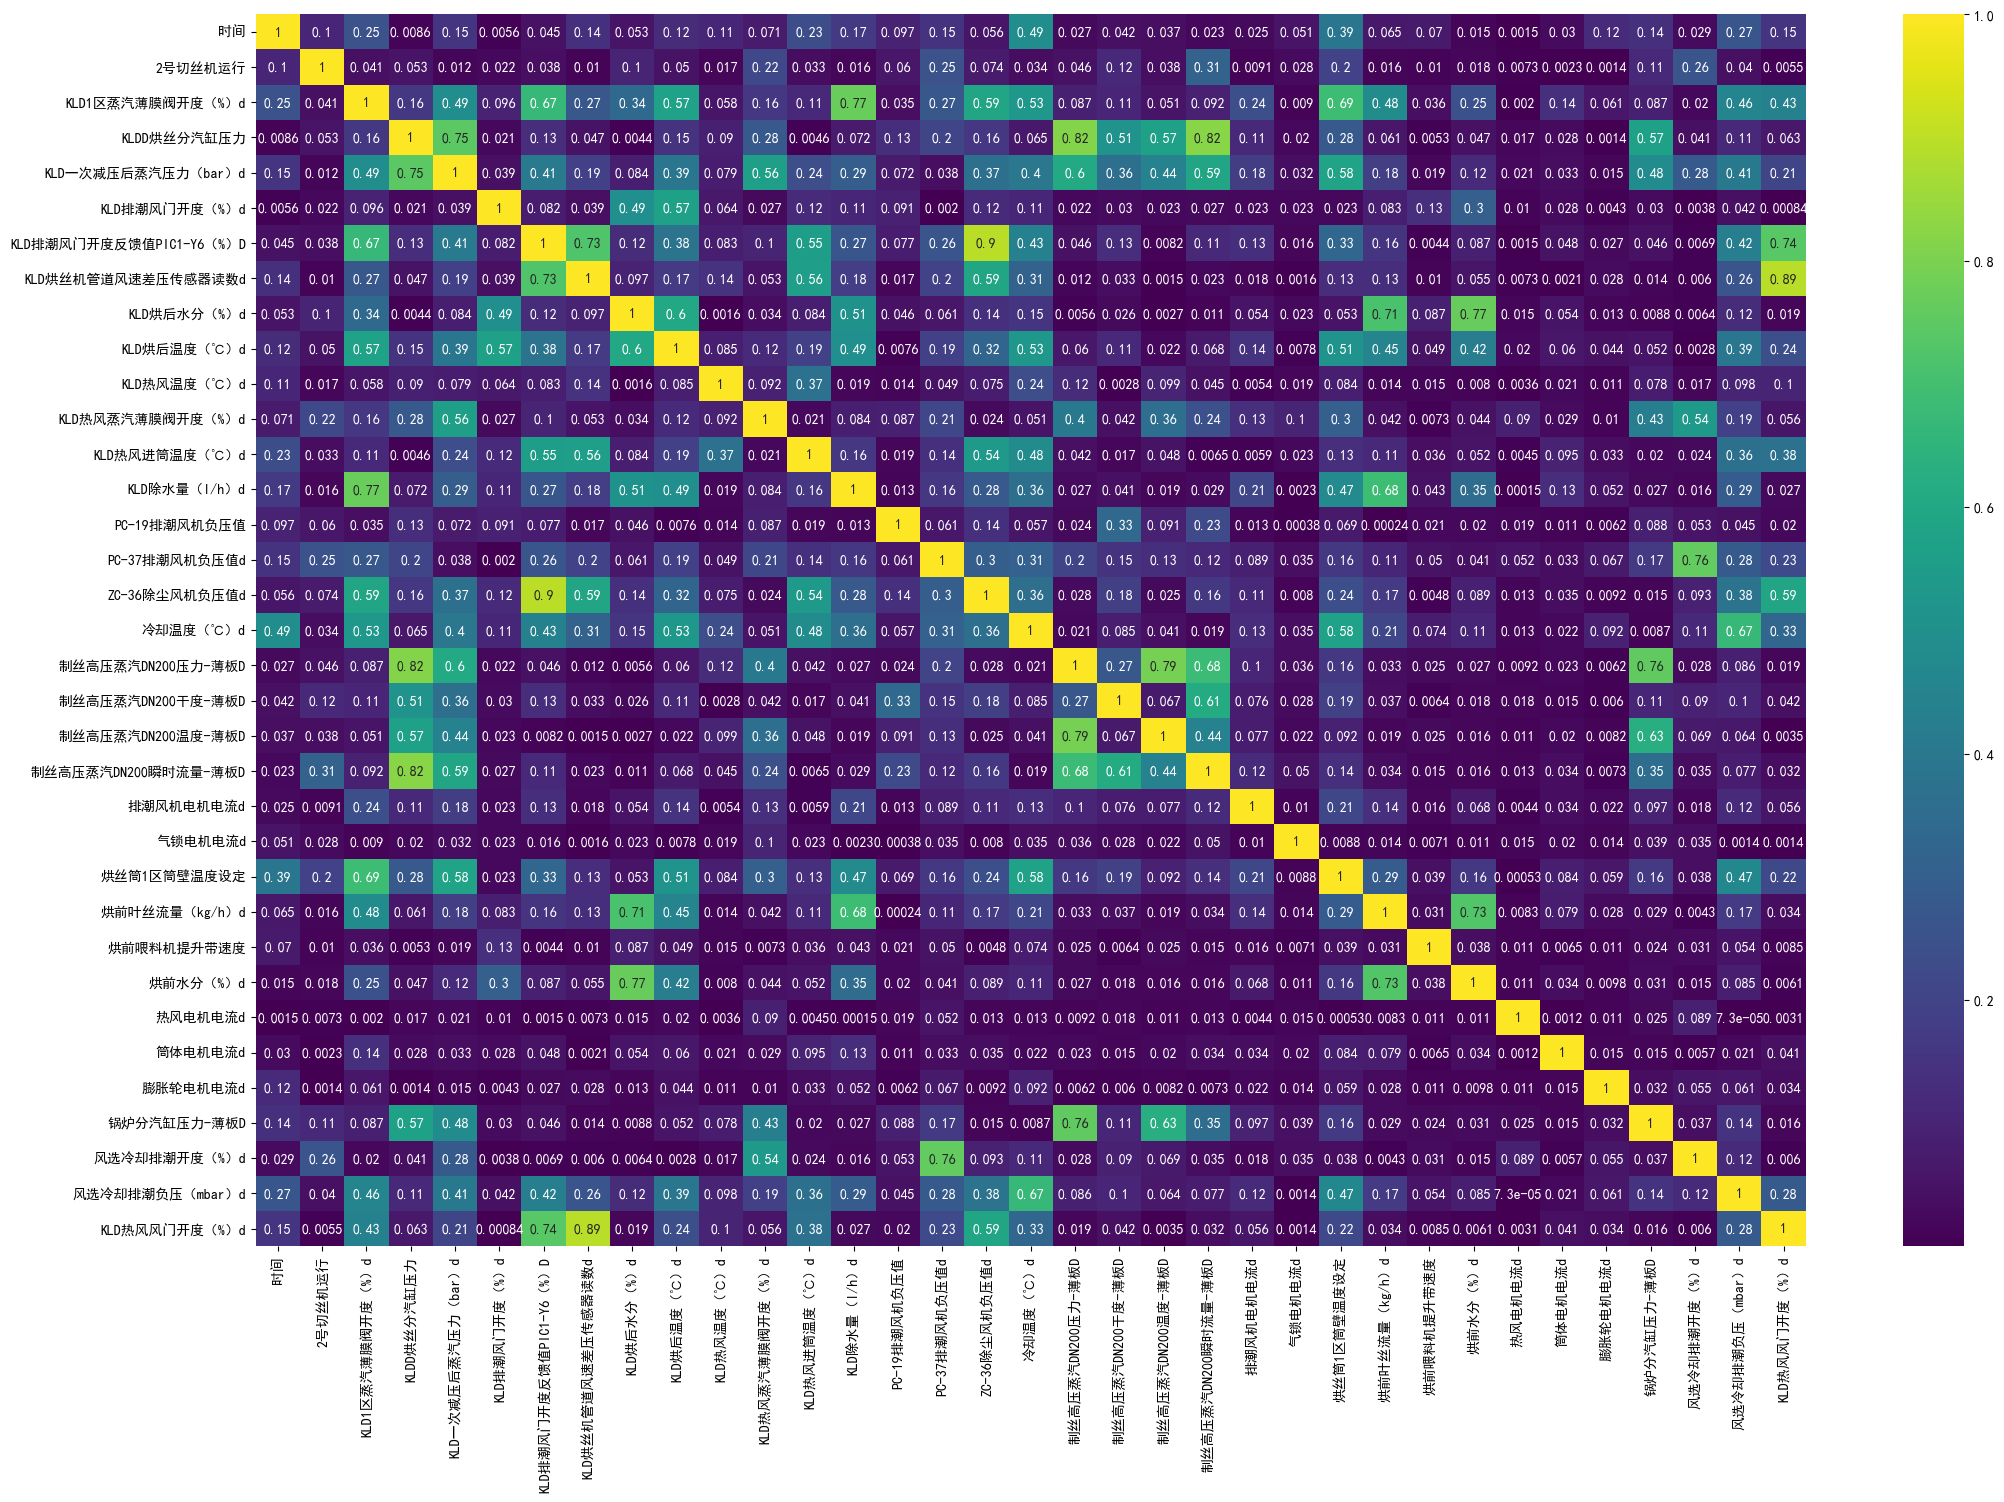

In [12]:
corr = data.corr()
ax = plt.subplots(figsize=(25,16))
ax = sns.heatmap(abs(corr),annot=True,cmap='viridis')

In [572]:
data = data.loc[:, ['KLD烘丝机管道风速差压传感器读数d', 'KLD1区蒸汽薄膜阀开度（%）d', '烘前喂料机提升带速度', '时间',
                    '烘前叶丝流量（kg/h）d', 'KLD除水量（l/h）d','KLD热风风门开度（%）d']]

In [28]:
import copy
# data.drop(columns=['KLD烘丝机管道风速差压传感器读数d','时间','除尘房排潮风门开度d','ZC-36除尘风机负压值d'],inplace=True) #
dd = copy.deepcopy(data)
dd = dd.drop(columns=['KLD热风风门开度（%）d'])
len(data.columns),len(dd.columns)

(40, 39)

In [257]:
# data['时间'] = data['时间'].astype('datetime64[ns]')
# data['时间'] = data[['时间']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
# # data['时间'] = data['时间'].astype('int64') // 10**9
# data['时间'] = data['时间'] - data['时间'][0]

# data.drop(columns=['Unnamed: 0'], inplace=True)

# data.head()

In [29]:
# KLD热风风门开度（%）d
y = data['KLD热风风门开度（%）d']
x = data.drop(columns=['KLD热风风门开度（%）d'])
# x.head()

数据集打乱

In [30]:
from sklearn.utils import shuffle
data = shuffle(data, n_samples=len(data))
data.shape

(20739, 40)

In [31]:
y = data['KLD热风风门开度（%）d']
x = data.drop(columns=['KLD热风风门开度（%）d'])
names = x.columns.tolist()

标准化

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

data.shape #,data[:,7], 

(20739, 40)

In [522]:
x = np.delete(data,6,axis=1)
y = data[:,6].reshape((-1,1))


x.shape, y.shape

((20739, 6), (20739, 1))

In [33]:
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x,y)
y = np.array(y)

选择模型

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(len(x_train))

16591


In [35]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [531]:
# 1
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
rf = clf.fit(x_train, y_train)
# rf.coef_
y_pred = rf.predict(x_test)
# print(y_pred)
rf.score(x_test, y_test)

0.8646415953999829

/tmp/ipykernel_992/3282668354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred))


<Axes: ylabel='Density'>

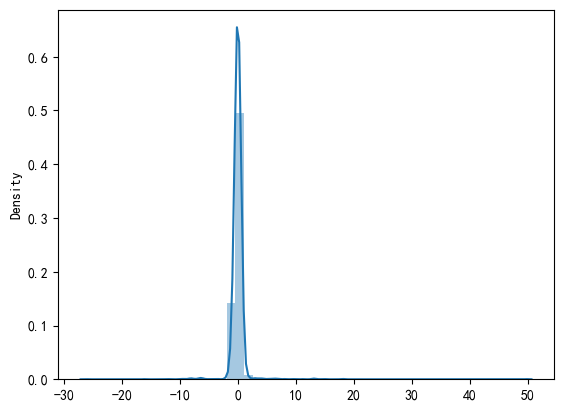

In [532]:
# plt.scatter(y_test,y_pred)
sns.distplot((y_test - y_pred))

In [533]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred)

mse,mae, rmse

(2.2734557250433713, 0.5462471815435671, 2.2734557250433713)

In [534]:
# 2
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_rf = knn.fit(x_train, y_train)
knn_pre = knn_rf.predict(x_test)
knn_rf.score(x_test, y_test)


0.9154170740273874

In [535]:
mse = metrics.mean_squared_error(y_test, knn_pre)
mae = metrics.mean_absolute_error(y_test, knn_pre)
rmse = metrics.mean_squared_error(y_test, knn_pre)

mse,mae, rmse

(1.4206398033545644, 0.17446313934426233, 1.4206398033545644)

In [293]:
import pickle

with open('model/knn.pickle', 'wb') as f:
    pickle.dump(knn, f)

In [294]:
with open('model/knn.pickle', 'rb') as f:
    new_knn = pickle.load(f)

In [299]:
# new_knn.predict(x_test)

new_knn.fit(x_test[:100,:], y_test[:100])
new_knn.score(x_test[100:,:], y_test[100:])

/tmp/ipykernel_992/1935175751.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  new_knn.fit(x_test[:100,:], y_test[:100])
/tmp/ipykernel_992/1935175751.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  new_knn.score(x_test[100:,:], y_test[100:])


array([[-1.68201796e-01, -1.41319774e+00, -1.31623085e-02, ...,
         3.55271368e-15, -5.50115042e-01, -2.89592588e-01],
       [-1.14063770e+00, -1.41319774e+00,  1.16461283e-01, ...,
         3.55271368e-15, -6.12589673e-01, -1.86056247e-01],
       [ 5.12196394e-02, -1.41319774e+00,  2.00407248e-01, ...,
         3.55271368e-15, -6.00099929e-01,  2.10450620e-02],
       ...,
       [ 1.56722228e+00,  7.07902887e-01,  1.74695709e-01, ...,
         3.55271368e-15,  1.78670222e+00,  5.38784021e-01],
       [-1.07580864e+00,  7.07902887e-01,  4.32306267e-02, ...,
         3.55271368e-15,  1.78670222e+00,  1.36717494e+00],
       [-2.13083453e-01,  7.07902887e-01,  1.82273984e-01, ...,
         3.55271368e-15,  1.78670222e+00,  3.31682712e-01]])

In [426]:
# 3
from sklearn.svm import SVR

svr = SVR(C=1, gamma=0.007)
svr_rf = svr.fit(x_train, y_train)
svr_pre = svr_rf.predict(x_train)
svr_rf.score(x_test, y_test)

# param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
# param_grid = {"svr__C":param_range,'svr_gamma':param_range,'svr_kernel':['rbf']}
# gs = GridSearchCV(estimator=svr,
#                   param_grid=param_range,
#                   scoring= 'r2')
# gs.fit(x_train, y_train)
# gs.best_score_, gs.best_params_

/mnt/e/code/offlineRL/revive/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.27336434687092037

In [427]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

7.847191114326774

In [428]:
# 4
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge_rf = ridge.fit(x_train, y_train)
ridge_pre = ridge_rf.predict(x_test)
ridge_rf.score(x_test, y_test)

0.550648129867767

In [614]:
# 5
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso_rf = lasso.fit(x_train, y_train)
lasso_pre = lasso_rf.predict(x_train)
lasso_rf.score(x_test, y_test)

0.774382328358178

In [429]:
# 6
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(alpha=0.01)
mlp_rf = mlp.fit(x_train, y_train) #.ravel()
mlp_pre = mlp_rf.predict(x_test)
mlp_rf.score(x_test, y_test)

/mnt/e/code/offlineRL/revive/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/e/code/offlineRL/revive/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8405331819487819

In [430]:
# 7
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr_rf = dtr.fit(x_train, y_train)
dtr_pre = dtr_rf.predict(x_test)
dtr_rf.score(x_test,y_test)

0.8190024534135537

In [431]:
# 8
from sklearn.tree import ExtraTreeRegressor
etr = ExtraTreeRegressor()
etr_rf = etr.fit(x_train, y_train)
etr_pre = etr_rf.predict(x_test)
etr.score(x_test, y_test)

0.7070616833429293

In [20]:
# 9
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg_rf = rfg.fit(x_train, y_train) #.ravel()
rfg_pre = rfg_rf.predict(x_test)
acc = rfg_rf.score(x_test, y_test)

<AxesSubplot: >

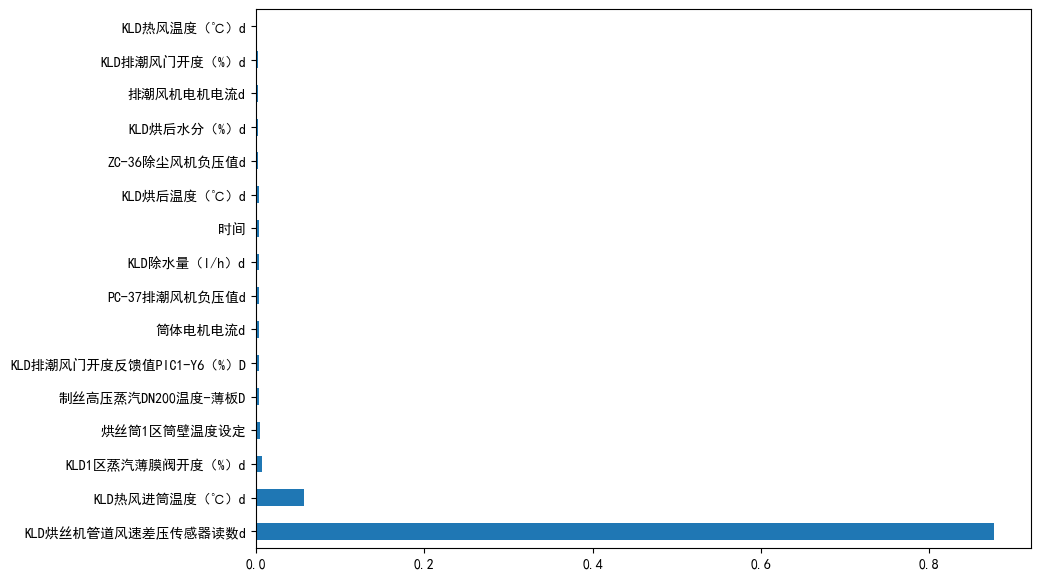

In [22]:
plt.figure(figsize=(10,7))
len(rfg.feature_importances_),len(dd.columns)
feat_importances = pd.Series(rfg.feature_importances_, index = dd.columns)
feat_importances.nlargest(16).plot(kind='barh')

In [23]:
col = feat_importances.nlargest(16)
col.index.to_list()

['KLD烘丝机管道风速差压传感器读数d',
 'KLD热风进筒温度（℃）d',
 'KLD1区蒸汽薄膜阀开度（%）d',
 '烘丝筒1区筒壁温度设定',
 '制丝高压蒸汽DN200温度-薄板D',
 'KLD排潮风门开度反馈值PIC1-Y6（%）D',
 '筒体电机电流d',
 'PC-37排潮风机负压值d',
 'KLD除水量（l/h）d',
 '时间',
 'KLD烘后温度（℃）d',
 'ZC-36除尘风机负压值d',
 'KLD烘后水分（%）d',
 '排潮风机电机电流d',
 'KLD排潮风门开度（%）d',
 'KLD热风温度（℃）d']

In [151]:
dd.columns.get_loc('KLD烘丝机管道风速差压传感器读数d')

6

In [561]:
names = x.columns.tolist()
x = np.array(x)
y = np.array(y)

In [36]:
from collections import defaultdict
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
rfr = RandomForestRegressor()



scaler = StandardScaler()

# x_train = scaler.fit_transform(x_train, y_train)
r = rfr.fit(x_train, y_train)
y_pre = rfr.predict(x_test)
acc = mean_absolute_error(y_test, y_pre)
acc

0.15854493093056884

In [37]:
rfr.score(x_test,y_test)

0.9333101954439947

In [85]:
mean_absolute_error_scores = []
r2_score_scores = []
mean_squared_error_scores = []
# mean_absolute_error_scores = defaultdict(list)
# r2_score_scores = defaultdict(list)
# mean_squared_error_scores = defaultdict(list)
for i in range(x.shape[1]):
    x_t = x_test.copy()
    np.random.shuffle(x_t[:, i])
    shuff_mean_absolute_error = mean_absolute_error(y_test,rfr.predict(x_t))
    shuff_r2_score = r2_score(y_test,rfr.predict(x_t))
    shuff_mean_squared_error = mean_squared_error(y_test,rfr.predict(x_t))
    mean_absolute_error_scores.append((acc-shuff_mean_absolute_error)/acc)
    r2_score_scores.append((acc-shuff_r2_score)/acc)
    mean_squared_error_scores.append((acc-shuff_mean_squared_error)/acc)
# print(sorted([(round(np.mean(score), 5), feat) for feat, score in scores.items()], reverse=True))


[Text(0, 0, '时间'),
 Text(1, 0, '2号切丝机运行'),
 Text(2, 0, 'KLD1区蒸汽薄膜阀开度（%）d'),
 Text(3, 0, 'KLDD烘丝分汽缸压力'),
 Text(4, 0, 'KLD一次减压后蒸汽压力（bar）d'),
 Text(5, 0, 'KLD排潮风门开度（%）d'),
 Text(6, 0, 'KLD烘丝机管道风速差压传感器读数d'),
 Text(7, 0, 'KLD烘后水分（%）d'),
 Text(8, 0, 'KLD烘后温度（℃）d'),
 Text(9, 0, 'KLD热风温度（℃）d'),
 Text(10, 0, 'KLD热风蒸汽薄膜阀开度（%）d'),
 Text(11, 0, 'KLD热风进筒温度（℃）d'),
 Text(12, 0, 'KLD除水量（l/h）d'),
 Text(13, 0, 'PC-19排潮风机负压值'),
 Text(14, 0, 'PC-37排潮风机负压值d'),
 Text(15, 0, 'PC-37排潮风机运行频率d'),
 Text(16, 0, 'ZC-35除尘风机运行频率d'),
 Text(17, 0, 'ZC-36除尘风机负压值d'),
 Text(18, 0, '冷却温度（℃）d'),
 Text(19, 0, '制丝高压蒸汽DN200压力-薄板D'),
 Text(20, 0, '制丝高压蒸汽DN200干度-薄板D'),
 Text(21, 0, '制丝高压蒸汽DN200温度-薄板D'),
 Text(22, 0, '制丝高压蒸汽DN200瞬时流量-薄板D'),
 Text(23, 0, '排潮风机电机电流d'),
 Text(24, 0, '排潮风机电机频率d'),
 Text(25, 0, '气锁电机电流d'),
 Text(26, 0, '烘丝筒1区筒壁温度设定'),
 Text(27, 0, '烘前叶丝流量（kg/h）d'),
 Text(28, 0, '烘前喂料机提升带速度'),
 Text(29, 0, '烘前水分（%）d'),
 Text(30, 0, '热风电机电流d'),
 Text(31, 0, '筒体电机电流d'),
 Text(32, 0, '膨胀轮电机电流d'),
 Text(33, 0, '锅炉分汽缸压力-薄板

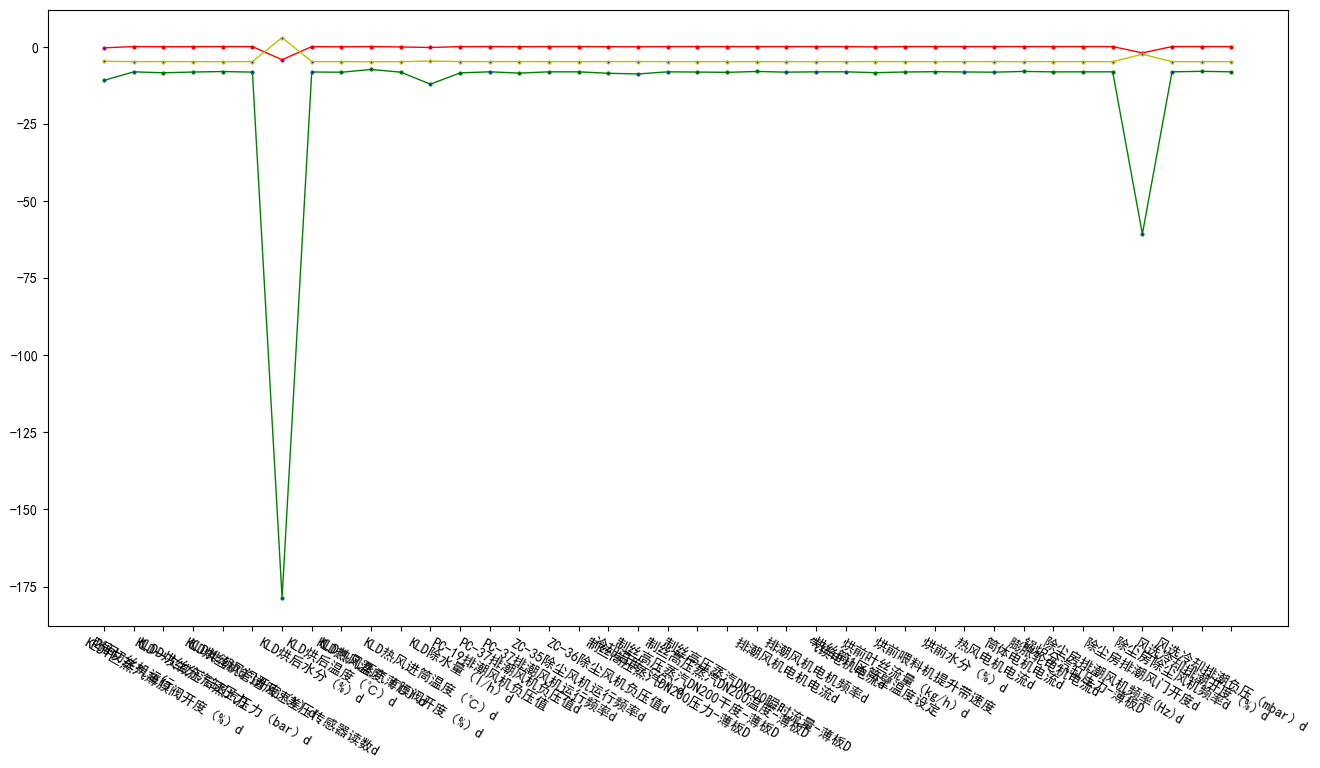

In [114]:
fig,ax = plt.subplots(figsize=(16,8)) 
plt.title('')
plt.tick_params(axis='x', labelsize=10) 
plt.plot(mean_absolute_error_scores,label='Frist line',linewidth=1,color='r',marker='o',
markerfacecolor='blue',markersize=2)
plt.plot(r2_score_scores,label='Frist line',linewidth=1,color='y',marker='o',
markerfacecolor='blue',markersize=2)
plt.plot(mean_squared_error_scores,label='Frist line',linewidth=1,color='g',marker='o',
markerfacecolor='blue',markersize=2)
plt.xticks(rotation=-30)
# ax.xaxis.set_ticks_position('bottom')
plt.xticks(np.arange(0,len(names),1)) #
ax.set_xticklabels(names)

TypeError: bar() got multiple values for keyword argument 'bottom'

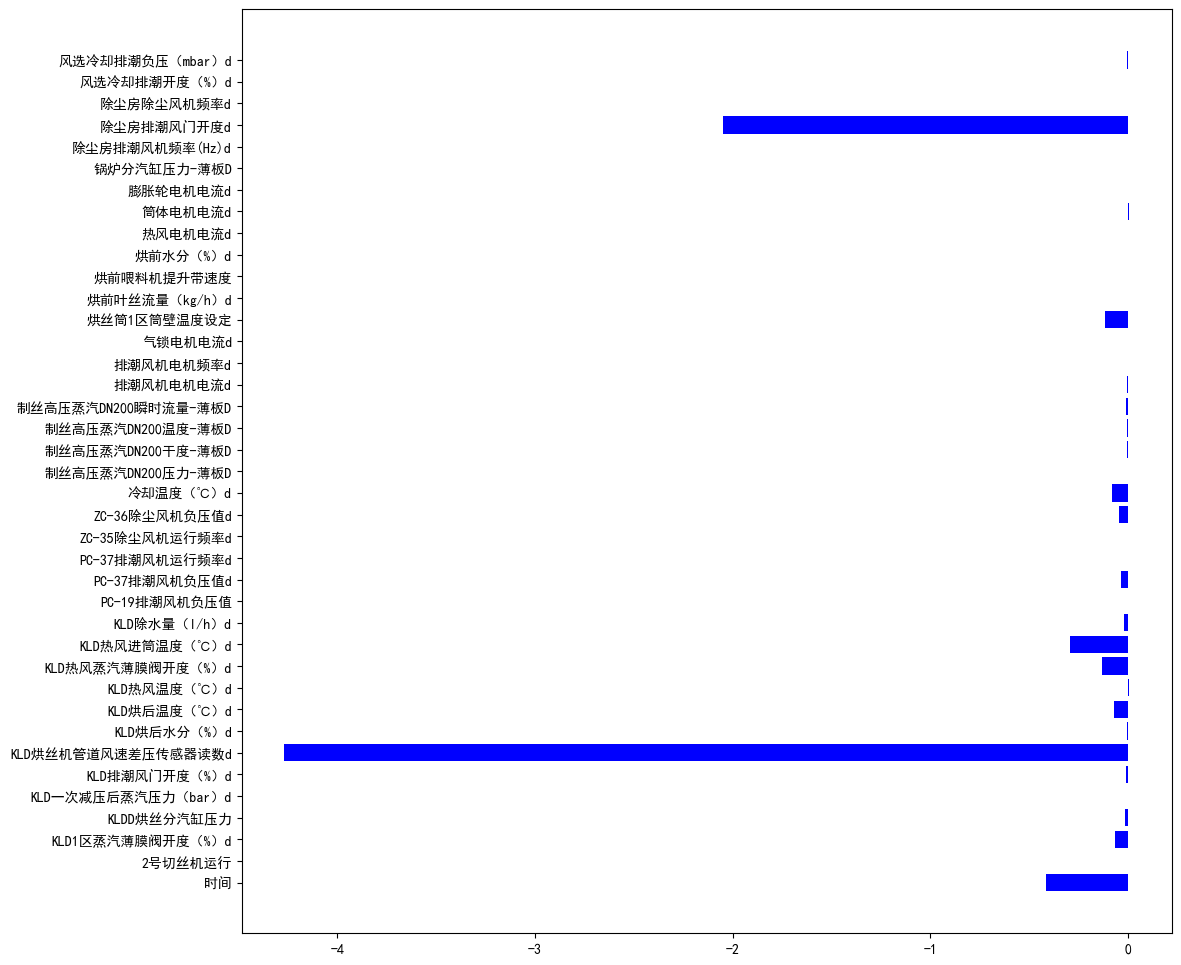

In [96]:
plt.figure(figsize=(12,12))
plt.barh(names, mean_absolute_error_scores,lw=0.01,fc='b',label = 'mae')
plt.barh(names, r2_score_scores,fc='g', label ='r2',bottom=mean_absolute_error_scores)
plt.barh(names, mean_squared_error_scores, fc='r',label ='mse',bottom=r2_score_scores)
plt.legend()

In [ ]:
(0.0, '风选冷却排潮开度（%）d'), (0.0, '除尘房除尘风机频率d'), (0.0, '除尘房排潮风机频率(Hz)d'), (-0.0, '锅炉分汽缸压力-薄板D'), (0.0, '排潮风机电机频率d'), 
(0.0, 'ZC-35除尘风机运行频率d'), (0.0, 'PC-37排潮风机运行频率d'), (-0.0, 'PC-19排潮风机负压值'), (0.0, '2号切丝机运行'),

In [ ]:
(0.0, '除尘房除尘风机频率d'), (0.0, '除尘房排潮风机频率(Hz)d'), (-0.0, '烘前叶丝流量（kg/h）d'), (0.0, '排潮风机电机频率d'), (0.0, 'ZC-35除尘风机运行频率d'),
(0.0, 'PC-37排潮风机运行频率d')

In [ ]:
(0.0, '除尘房除尘风机频率d'), (0.0, '除尘房排潮风机频率(Hz)d'), (0.0, '排潮风机电机频率d'), (0.0, 'ZC-35除尘风机运行频率d'), (0.0, 'PC-37排潮风机运行频率d'),

In [580]:
from sklearn.model_selection import ShuffleSplit
from collections import defaultdict
from sklearn.metrics import r2_score
rfr = RandomForestRegressor()
scores = defaultdict(list)
scaler = StandardScaler()
ss = ShuffleSplit(len(x))

for train_idx, test_idx in ss.split(x):
    # print(train_idx, test_idx)
    x_train, x_test = x[train_idx], x[test_idx]
    y_train,y_test = y[train_idx], y[test_idx]
    x_train = scaler.fit_transform(x_train, y_train)
    r = rfr.fit(x_train, y_train)
    acc = r2_score(y_test, rfr.predict(x_test))
    for i in range(x.shape[1]):
        x_t = x_test.copy()
        np.random.shuffle(x_t[:, i])
        shuff_acc = r2_score(y_test,rfr.predict(x_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
print(sorted([(round(np.mean(score), 4), feat) for feat, score in scores.items()], reverse=True))

KeyError: "None of [Int64Index([ 3408, 13077,  2622,  1464,  1716, 12482,  4288, 15643, 17825,\n             5324,\n            ...\n             8583, 11521, 13145,  3115,  3323, 11185, 20203,  8967,  8100,\n            13066],\n           dtype='int64', length=18665)] are in the [columns]"

In [433]:
# 10
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
abr_rf = abr.fit(x_train, y_train) #.ravel()
abr_pre = abr_rf.predict(x_test)
abr_rf.score(x_test, y_test)

/mnt/e/code/offlineRL/revive/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9338876201627672

In [434]:
# 11
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr_rf = gbr.fit(x_train, y_train) #.ravel()
gbr_pre = gbr_rf.predict(x_test)
gbr_rf.score(x_test, y_test)

/mnt/e/code/offlineRL/revive/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9338872243476922

In [435]:
# 12
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
br_rf = br.fit(x_train, y_train)#.ravel()
br_pre = br_rf.predict(x_test)
br_rf.score(x_test, y_test)

/mnt/e/code/offlineRL/revive/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.9279334270151522

In [145]:
import joblib
from sklearn.pipeline import make_pipeline
scaler_filename = 'scaler.save'
joblib.dump(scaler,scaler_filename)

['scaler.save']

In [146]:
s = joblib.load(scaler_filename)

In [81]:
scaler_y = StandardScaler()
# y_ = np.array(y).reshape(1,-1)
# print(y_)
y_ = scaler_y.fit_transform(y.values.reshape(1,-1))
# print(y_[0])
# y_y = scaler_y.inverse_transform(y_)
# y_y[0][:100]

In [133]:
import os
filepath = './mis_data'
file = os.listdir(filepath)
tes_f = int(len(file) * 0.8)
testd = pd.DataFrame()
for f in file[:tes_f]:
    n = pd.read_csv(os.path.join(filepath, f), encoding='utf-16', sep='\t')
    testd = pd.concat([testd, n])
    # print(f)
    # break


In [134]:
len(testd)

33204